<a href="https://colab.research.google.com/github/kaylacroiger/Probability-and-Statistics/blob/main/Kayla_Croiger_Math_24_Lab_10_Linear_Auto_Gen_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()
#checks if the input is a PyTorch Tensor and then moves it to a CPU and concerts it to an array
#Pytorch tensor is a mutli-dimensional matrix that contains the elements of a single data type
#A two dimensional tensor would be a matrix

    fig, ax = plt.subplots()
  #creates the figure and plots to graph
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
#axis lines off, image displayed in greyscale, size is 5 by 5 inches, and shows the graph of the previously plotted data

In [ ]:
#montage_plot plots a montage of images arranged in an array

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)),
    #no padding will be displayed along the outside boarder by setting the constant value to 0
               mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000
#batch size for the operation will be equal to 0.
def get_batch(mode):
    if mode == "train":
#retirves batch from training sets displayed below
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
#testing using the random integer functions
    return x,y

Batch Normalization
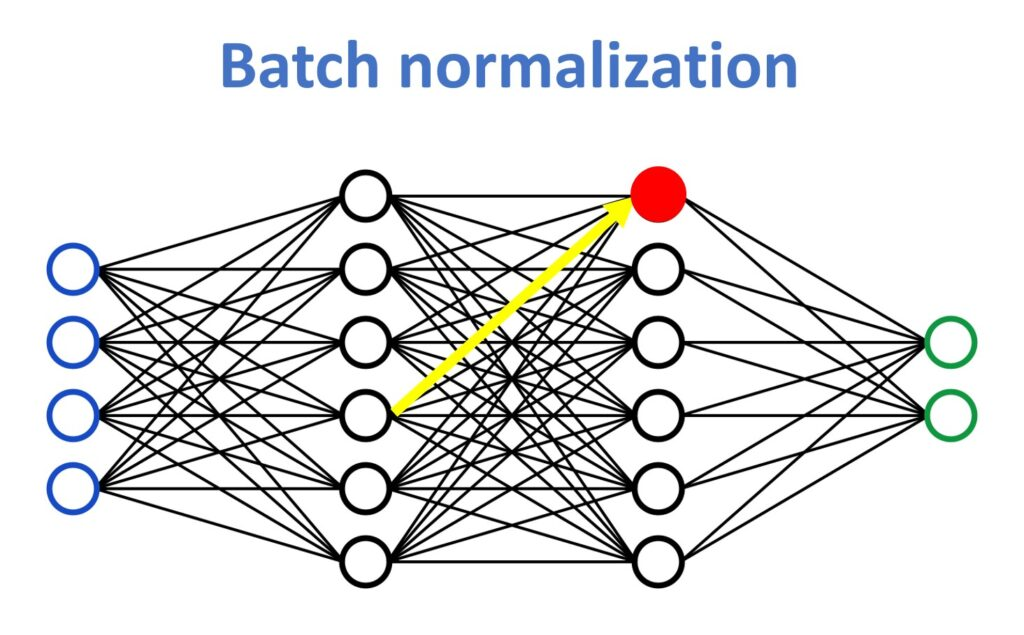

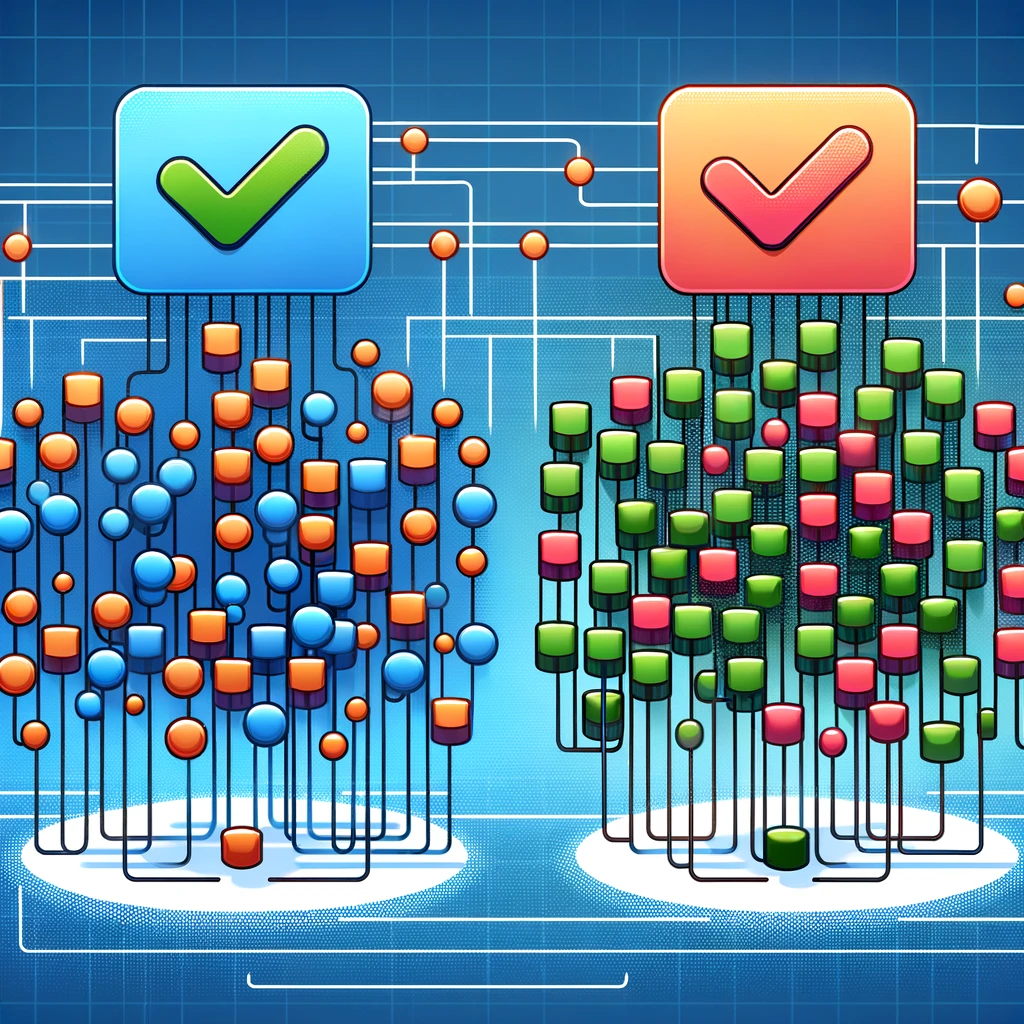

In [ ]:
#This image is representing the concept of selecting batches of data for training and testing
#Machine learning will utilize this data to learn how a large data group can be organized and broken down into smaller groups
#In this type of training there are certain markers and for training as well as testing with accuracy and loss percentage calculations


## MNIST
    

### Load Data

This code is using three different datasets from PyTorch MNIST, KMINST, Fashion MNIST

MNIST data set is a training set of greyscale handwritten numbers 0-9 that is commonly used in Machine learning
KMNIST data set is similar but instead of hanwritten numbers it displays handwritten Japanese characters, therefore, it proves to be more complicated than MNIST set .
The Fashion MNIST set is a training set of 60,000 values which features Zalando's article images.

In [ ]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 481367503.12it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25950234.32it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 124520910.99it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21897159.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

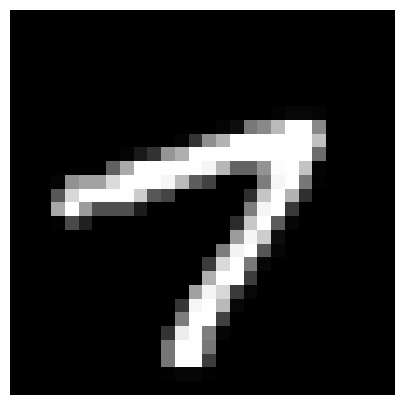

In [ ]:
plot(X[101,0,:,:])

In [ ]:
Y[100]

5

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

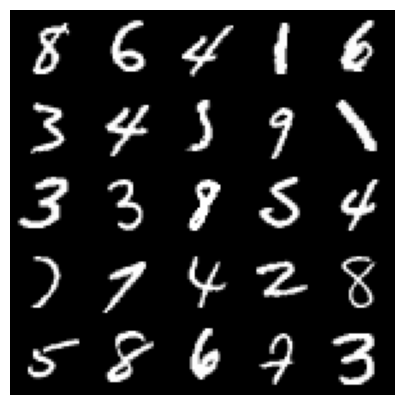

In [ ]:
montage_plot(X[125:150,0,:,:])
#indexing the variable plot

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
#all of these codes are used for machiene learning and training the aritficial intelligents using the Tensor's datasets


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

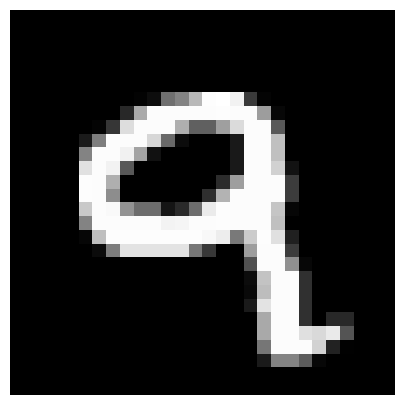

In [ ]:
plot(x[0].reshape(28,28))

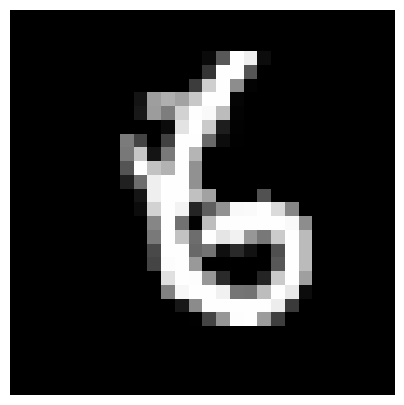

In [ ]:
plot(x[1].reshape(28,28))

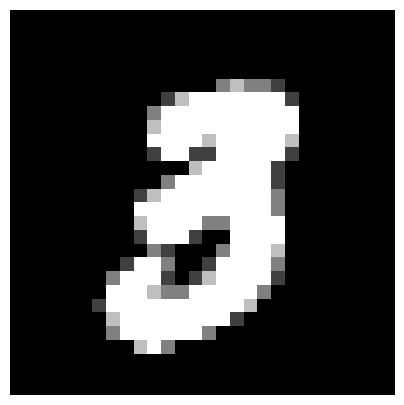

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

tensor([9., 6., 3., 2., 4., 7., 8., 1., 3., 5.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10))

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.8 µs ± 851 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W

tensor([[ -7.8802,  -5.3323,  -7.2223,  ...,  16.6418,   7.3769,  -9.8605],
        [  2.7558,  -7.0671,  -7.6586,  ...,  -1.4599,   3.8528,  -7.8600],
        [ -2.5149, -22.0328, -18.8927,  ...,   7.5078,   2.0121, -10.6705],
        ...,
        [-11.3224,   4.6294, -11.5364,  ...,  18.8365,  -7.4737,   2.2349],
        [-13.5618, -18.2537,  -9.3115,  ...,  -6.7234,  -5.0563,   9.6656],
        [ -4.4739,  -3.3999, -30.7359,  ...,  -3.2947, -10.2692,   1.3731]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W

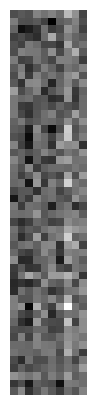

In [ ]:
plot(y2[:50])
#each shaded box is created by "one hot" it chooses the largest value and shades in the bubble

In [ ]:
y
#all of the guesses are between 0 and 9
#we want to compute how many of them are correct

tensor([9., 6., 3., 2., 4., 7., 8., 1., 3., 5., 0., 6., 2., 2., 1., 5., 5., 0.,
        1., 5., 6., 4., 0., 2., 3., 0., 2., 8., 2., 0., 7., 1., 2., 2., 4., 3.,
        6., 4., 0., 5., 5., 6., 4., 7., 9., 8., 1., 7., 8., 1., 8., 7., 9., 7.,
        1., 0., 4., 1., 3., 4., 8., 4., 7., 4., 3., 5., 2., 7., 3., 4., 7., 9.,
        4., 7., 5., 2., 1., 6., 7., 3., 7., 9., 3., 4., 3., 9., 9., 0., 6., 8.,
        1., 7., 6., 9., 4., 0., 7., 6., 1., 3., 4., 0., 3., 4., 5., 6., 6., 3.,
        6., 7., 5., 8., 1., 9., 7., 3., 3., 1., 4., 8., 8., 4., 3., 2., 0., 9.,
        6., 8., 2., 2., 3., 8., 6., 6., 7., 5., 2., 2., 5., 6., 6., 9., 8., 6.,
        9., 0., 6., 3., 0., 6., 8., 3., 4., 1., 2., 2., 3., 5., 2., 0., 1., 3.,
        1., 7., 5., 6., 6., 1., 7., 5., 5., 5., 9., 9., 6., 8., 8., 0., 2., 9.,
        4., 0., 2., 1., 3., 2., 2., 3., 4., 4., 6., 7., 6., 8., 7., 9., 9., 0.,
        7., 1., 3., 2., 5., 0., 7., 1., 6., 5., 2., 1., 7., 3., 4., 9., 5., 0.,
        2., 9., 7., 7., 9., 1., 5., 3., 

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

<ipython-input-18-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1)

tensor([7, 8, 7, 5, 7, 8, 6, 9, 8, 3, 0, 7, 0, 8, 9, 7, 7, 6, 9, 7, 2, 7, 7, 9,
        8, 0, 3, 7, 7, 7, 8, 4, 7, 5, 7, 4, 9, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7,
        7, 1, 7, 7, 9, 7, 7, 4, 7, 9, 6, 7, 8, 7, 4, 7, 8, 7, 8, 7, 8, 7, 1, 7,
        9, 8, 7, 9, 9, 9, 7, 8, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 3, 7, 3, 7, 7,
        7, 7, 9, 7, 7, 7, 8, 7, 7, 7, 0, 4, 8, 7, 6, 4, 9, 9, 7, 0, 7, 4, 7, 8,
        3, 0, 8, 5, 7, 3, 0, 0, 7, 0, 8, 4, 9, 7, 7, 8, 7, 5, 8, 7, 7, 3, 3, 7,
        7, 9, 7, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 9, 4, 9, 8, 8, 9, 7, 9,
        7, 7, 7, 7, 9, 3, 7, 4, 7, 7, 7, 4, 7, 7, 7, 9, 8, 8, 7, 3, 7, 2, 0, 8,
        4, 7, 7, 7, 7, 7, 5, 9, 8, 7, 9, 7, 7, 9, 9, 7, 6, 7, 8, 0, 7, 7, 3, 6,
        0, 7, 4, 3, 9, 7, 2, 3, 7, 0, 7, 7, 2, 8, 7, 7, 7, 3, 7, 4, 6, 7, 1, 0,
        9, 2, 8, 3, 7, 7, 7, 9, 7, 7, 7, 4, 8, 7, 3, 4, 7, 7, 9, 4, 1, 7, 7, 9,
        7, 7, 7, 7, 5, 9, 7, 7, 2, 7, 9, 9, 7, 9, 5, 3, 9, 7, 9, 7, 9, 3, 9, 8,
        7, 7, 7, 9, 7, 0, 3, 3, 7, 7, 6,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0970, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[  3.5927,  -6.5396, -15.6591,  ...,  -5.5846,   4.9577,  -9.1936],
        [  3.8942,  -8.1247,  -5.8314,  ...,  13.9478,  -2.5337,  -0.9220],
        [-15.5467,  -1.5218,  11.9113,  ...,  10.5431,  -1.2398,   0.5638],
        ...,
        [-16.6796, -12.4980,  -3.3786,  ...,   3.5009,  -0.4825,   2.1755],
        [ -0.7585,   6.9329,   5.4708,  ...,   9.0374,  -1.6586,  -5.6934],
        [ -8.8955, -11.4317,   9.0983,  ...,  -0.2078,   3.4962, -13.4622]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([8, 7, 2,  ..., 3, 7, 4], device='cuda:0')

In [ ]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000
#calculating accuracy of the guesses.

tensor(0.0868, device='cuda:0')

In [ ]:
X@W

tensor([[  3.5927,  -6.5396, -15.6591,  ...,  -5.5846,   4.9577,  -9.1936],
        [  3.8942,  -8.1247,  -5.8314,  ...,  13.9478,  -2.5337,  -0.9220],
        [-15.5467,  -1.5218,  11.9113,  ...,  10.5431,  -1.2398,   0.5638],
        ...,
        [-16.6796, -12.4980,  -3.3786,  ...,   3.5009,  -0.4825,   2.1755],
        [ -0.7585,   6.9329,   5.4708,  ...,   9.0374,  -1.6586,  -5.6934],
        [ -8.8955, -11.4317,   9.0983,  ...,  -0.2078,   3.4962, -13.4622]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

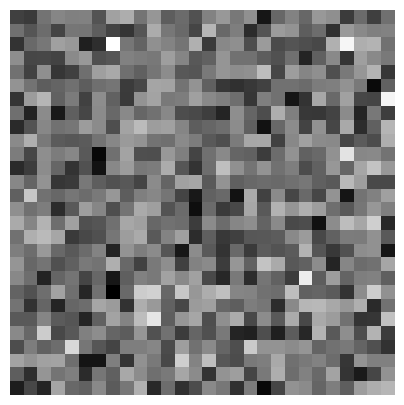

In [ ]:
plot(W[:,0].reshape(28,28))

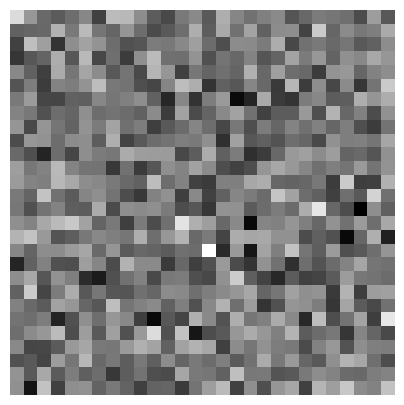

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

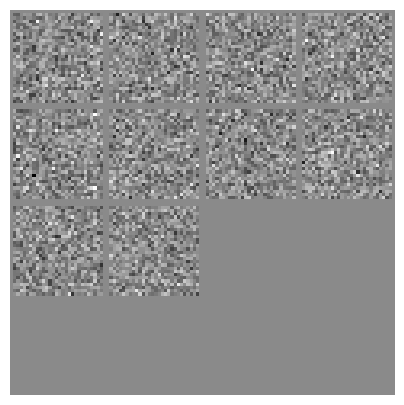

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
  #scaled max
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
  #counts and scores how many of them are correct
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def acc(out,y):
  #gives us the accuracy of the guesses in the model
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):
  #model that just multiplies x by w.

    return x@w[0]

Gradient Step:
Important Aspect in Machine Learning
New weights are what the old weights were minus the speed combined with the gradient model.
Mathematical Gradiation

In [ ]:
def gradient_step(w):
  #key to machine learning
  #idea from calculus and simple arthimtic
  #figuring out how to change the perameter in two or three perameters and how to find them
  #these models have millions of perameters


    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')
    #new testing data to get testing accurary

    acc_test = acc(model(xt,w),yt)
    #logs the bias by taking accuracy for training and the accuracy for testing

    wb.log({"acc_train": acc_train, "acc_test": acc_test})
    #plots the points for testing and training to compare accuracy

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

Graphs and Displays how the accuracy depends on the given perameters.

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config
#tells the ai that anythign that starts with a C will be saved into the graident for bias

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]
  #normal distribution model using the given matrix

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)
#modeling the slope formula

        loss = cross_entropy(softmax(out),y)
#lower loss scores = higher accuracy
#the closer the loss is to 0 the more accurate the system is running

        loss.backward()
#automatic differentiation
#does the loss backwards and finds out how it changes with respect to all perameters

        gradient_step(w)
#printing out how the weights look

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [ ]:
#After running this same code for a while, the image becomes more clear as to how the shading is configured

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

#shows the graphs of accuracy and loss, when the program is run over and over
#after a couple of runs the accuracy will become closer and closer to 100% and the loss will become closer and closer to 0%
#socastic graident descent: randomness of accuracy not improving due to random factors

In [ ]:
#All of the perameters started at 0
#using the number arrays, it used the receptive field to train the model of what to look for.


### Autoencoder


Takes an image and turns it into a column vector by multipling by a matrix. Number of columns will match the number of rows. Start with 784 dimensions, breaks it down through the column vectors and matrix mutlipliers, results with a 28 dimension image. After embedding the image we try to recover it.

Autoencoder: encodes and image and then recovers it.

In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
import torchvision
from torch.nn.functional import *

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
#encorder takes the image from the perameters (w) convolution relu over and over "flattening" the image and then using linear multiplication to build the figure

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
#the decoder does what the encoder does in exact reverse

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))
#initalizing the weights for the encoder and decoder

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)
#adding in an optimizer to train the tensor

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())
    #every 100 sets, the loss is printed out
    #this helps the tensor to train to become more accurate

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Generative Adversarial Network (GAN): consists of to networks which include a generator and a discriminator, both of which are trained together from a form of adversial training.

In [ ]:
#machine learning model to flatten

In [ ]:
latent_size = 64
#decodes the image to the latent size and then encodes it back to the original
hidden_size = 256
#an intermediate layer
image_size = 784
b = 1024
#batch for training

In [ ]:
#the autoencoder compresses the given image to a latent size
#the decoder then reconstructs the image to its normal size
#in this function a batch of real images from the training set is returned with labels.

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [1]:
#Image Classification Task
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
#all of these are being converted to NumPy arrays
X = X[:,None,:,:]/255
#None adds a singleton dimension to the arrays
#the X/255 to (0,1) is to ensure that the model inputs are on a similar scale, which helps with the training constant.
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

NameError: name 'train_set' is not defined

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())
#defines the batches and the real versus fake image labels which will be summed to calculate loss.

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):

    images,y = get_batch('train')
    #collecting a batch of real images

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    #computing the loss comparing the discriminator two ways
    #1. by comparing the discrinator's preditiction on real images to a tensor of ones
    #2. by comparing the discriminator's prediction on fake images to a tensor ofzeros
    #the loss is the sum of both of these components

    d_optimizer.zero_grad()
    #clears old data and gradients
    d_loss.backward()
    #updates the peramters by working backwards
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
      #i must be a multiple of 200
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

In [ ]:
plot(output[0,0])

#Practice

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [8]:
# Step 1: Load and preprocess the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to PyTorch tensors and scales pixels between [0., 1.]
    transforms.Normalize((0.5,), (0.5,))  # Normalizes pixels to [-1, 1]
])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)  # Input channels = 1, output channels = 32
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # Output 10 classes for MNIST

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Step 3: Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 4: Train the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 0:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

# Step 5: (Optional) Save the trained model
# torch.save(net.state_dict(), 'mnist_cnn.pth')


100%|██████████| 9912422/9912422 [00:00<00:00, 297315526.25it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 98244682.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 166047812.64it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19844300.80it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[1, 1] loss: 0.012
[1, 201] loss: 0.423
[1, 401] loss: 0.103
[1, 601] loss: 0.085
[1, 801] loss: 0.072
[2, 1] loss: 0.000
[2, 201] loss: 0.041
[2, 401] loss: 0.048
[2, 601] loss: 0.047
[2, 801] loss: 0.042
[3, 1] loss: 0.000
[3, 201] loss: 0.032
[3, 401] loss: 0.028
[3, 601] loss: 0.030
[3, 801] loss: 0.029
[4, 1] loss: 0.000
[4, 201] loss: 0.024
[4, 401] loss: 0.029
[4, 601] loss: 0.022
[4, 801] loss: 0.024
[5, 1] loss: 0.000
[5, 201] loss: 0.018
[5, 401] loss: 0.023
[5, 601] loss: 0.019
[5, 801] loss: 0.024
[6, 1] loss: 0.000
[6, 201] loss: 0.014
[6, 401] loss: 0.019
[6, 601] loss: 0.011
[6, 801] loss: 0.016
[7, 1] loss: 0.000
[7, 201] loss: 0.013
[7, 401] loss: 0.015
[7, 601] loss: 0.011
[7, 801] loss: 0.019
[8, 1] loss: 0.000
[8, 201] loss: 0.010
[8, 401] loss: 0.008
[8, 601] loss: 0.012
[8, 801] loss: 0.016
[9, 1] loss: 0.000
[9, 201] loss: 0.013
[9, 401] loss: 0.011
[9, 601] loss: 0.012
[9, 801] loss: 0.01